In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm,  tree, preprocessing, metrics

In [2]:
#load data as dataframes
test_data = pd.read_csv('./test.csv',index_col=False)
train_data = pd.read_csv ('./train.csv', index_col=False)

In [3]:
#looking at data

In [4]:
def drop_and_purge(table,colums_to_drop,purge=True):
    for col in colums_to_drop:
        try:
            del table[col]
        except KeyError as exp:
            print('colum',exp,'not found in table')
    if purge:
        table.dropna()

In [5]:
def quantise(table,dict_to_quantize):
    '''takes table and dict {column_name:[{value_in_table:value_to_replace_with}]}
    example:- quantise(table,{Sex:[{male:1},{female:0}]}) will replace male and female in Sex column of table with 1 and 0'''
    for val in dict_to_quantize:
        for string_to_replace in dict_to_quantize[val]:
            value_to_replace_with = dict_to_quantize[val][string_to_replace]
            table[val].replace(string_to_replace,value_to_replace_with,inplace=True)

In [6]:
#test drop_and_purge functions
coloums_to_drop = ['Name','Ticket','Cabin','Fare']
drop_and_purge(test_data,coloums_to_drop,purge=False)
drop_and_purge(train_data,coloums_to_drop)

In [7]:
print(test_data.head())
print(train_data.head())

   PassengerId  Pclass     Sex   Age  SibSp  Parch Embarked
0          892       3    male  34.5      0      0        Q
1          893       3  female  47.0      1      0        S
2          894       2    male  62.0      0      0        Q
3          895       3    male  27.0      0      0        S
4          896       3  female  22.0      1      1        S
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0            1         0       3    male  22.0      1      0        S
1            2         1       1  female  38.0      1      0        C
2            3         1       3  female  26.0      0      0        S
3            4         1       1  female  35.0      1      0        S
4            5         0       3    male  35.0      0      0        S


In [8]:
quantise(test_data,{'Sex':{'male':1,'female':0}})
quantise(test_data,{'Embarked':{'Q':0,'C':1,'S':2}})
quantise(train_data,{'Sex':{'male':1,'female':0}})
quantise(train_data,{'Embarked':{'Q':0,'C':1,'S':2}})
print(test_data.head())
print(train_data.head())

   PassengerId  Pclass  Sex   Age  SibSp  Parch  Embarked
0          892       3    1  34.5      0      0         0
1          893       3    0  47.0      1      0         2
2          894       2    1  62.0      0      0         0
3          895       3    1  27.0      0      0         2
4          896       3    0  22.0      1      1         2
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
0            1         0       3    1  22.0      1      0       2.0
1            2         1       1    0  38.0      1      0       1.0
2            3         1       3    0  26.0      0      0       2.0
3            4         1       1    0  35.0      1      0       2.0
4            5         0       3    1  35.0      0      0       2.0


In [9]:
data_dist_sex = train_data['Sex'].value_counts()
print(data_dist_sex[1])

577


In [10]:
male_survived = 0
female_survived = 0
for index, row in train_data.iterrows():
    if row['Survived'] == 1:
        if row['Sex'] == 1:
            male_survived = male_survived + 1
        else:
            female_survived = female_survived + 1
print(male_survived,female_survived)

109 233


In [11]:
def survivedCalc(prob):
    random = np.random.choice([0, 1], p=[1-prob, prob])
    #print(random)
    return random

In [12]:
perct_male_survived = male_survived/data_dist_sex[1]
perct_female_survived = female_survived/data_dist_sex[0]

In [13]:
sLength = len(test_data['Sex'])
test_data['Survived'] = pd.Series(np.zeros(sLength,dtype=np.int8), index=test_data.index)
for index, row in test_data.iterrows():
    if row['Sex'] == 'male':
        val = survivedCalc(perct_male_survived)
        test_data = test_data.set_value(index,'Survived',val)
    else:
        val = survivedCalc(perct_female_survived)
        test_data = test_data.set_value(index,'Survived',val)

In [14]:
print(test_data.head())
#gensubmission = pd.DataFrame(0,index=[i for i in range (0,sLength)],columns=['PassengerId','Survived'])

   PassengerId  Pclass  Sex   Age  SibSp  Parch  Embarked  Survived
0          892       3    1  34.5      0      0         0         1
1          893       3    0  47.0      1      0         2         1
2          894       2    1  62.0      0      0         0         0
3          895       3    1  27.0      0      0         2         1
4          896       3    0  22.0      1      1         2         0


In [15]:
gensubmission = test_data[['PassengerId', 'Survived']].copy()
gensubmission.to_csv('./submission.csv',index=False)


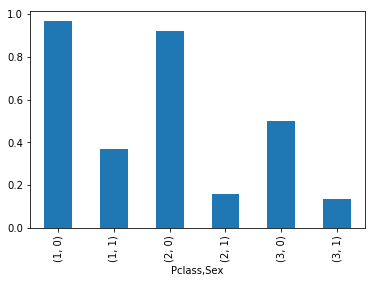

In [16]:
train_data['Survived'].mean()
class_sex_grouping = train_data.groupby(['Pclass','Sex']).mean()
class_sex_grouping
class_sex_grouping['Survived'].plot.bar()

plt.show()

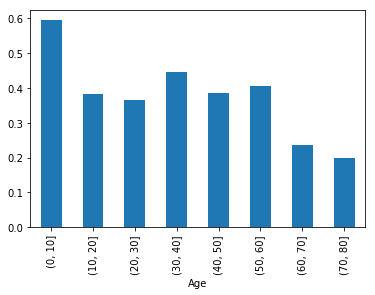

In [17]:
group_by_age = pd.cut(train_data["Age"], np.arange(0, 90, 10))
age_grouping = train_data.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

plt.show()

In [25]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)
train_data = train_data.dropna()
print(train_data.head())
Y = train_data['Survived'].values
X = train_data.drop(['Survived','PassengerId'], axis=1).values


clf_dt.fit (X, Y)
clf_dt.

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
0            1         0       3    1  22.0      1      0       2.0
1            2         1       1    0  38.0      1      0       1.0
2            3         1       3    0  26.0      0      0       2.0
3            4         1       1    0  35.0      1      0       2.0
4            5         0       3    1  35.0      0      0       2.0


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [38]:
for index, row in test_data.iterrows():
    if row.isnull().values.any() == False:
        data = row[[ 'Pclass' , 'Sex','Age','SibSp','Parch','Embarked']]
        data = data.values
        val = clf_dt.predict(data.reshape(-1,6))
        test_data = test_data.set_value(index,'Survived',val)
    else:
        val = np.random.choice([0, 1], p=[0.5, 0.5])
        test_data = test_data.set_value(index,'Survived',val)

In [39]:
gensubmission = test_data[['PassengerId', 'Survived']].copy()
gensubmission.to_csv('./DSsubmission.csv',index=False)